<a href="https://colab.research.google.com/github/tusarrpatel/Collab/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is example of multiple regression

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import r_regression, SelectKBest
from numpy import set_printoptions

Reading the wind turbine dataset

In [ ]:
windDS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
windDS.head

##                   **DATA PRE-PROCESSING**






In [19]:
windDS.shape

(208910, 21)

**1.Checking for missing value**





In [21]:
windDS.isna().sum()


active_power              0
timestamp                 0
pitch_angle               0
reactive_power            0
nacelle_angle             0
nacelle_temp              0
wind_speed1               0
wind_speed2               0
wind_speed_avg            0
wind_angle                0
vane_angle                0
outdoor_temp              0
rotor_angular_velocity    0
rotor_bearing_temp        0
weather_temp              0
pressure                  0
humidity                  0
weather_wind_speed        0
weather_wind_angle        0
rain_1h                   0
snow_1h                   0
dtype: int64

**Conclusion:** The dataset does not have missing values

**2. Checking for duplicate rows**






In [22]:
windDS.duplicated().any()

False

**Conclusion**: The dataset does not have duplicate values

### **Exploratory Data Analysis**

**1. Distribution of the target variable**

<ipython-input-25-39f4c40688ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(windDS['active_power']);


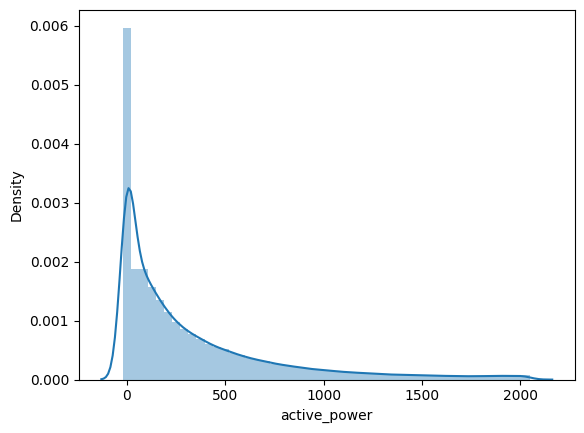

In [25]:
sns.distplot(windDS['active_power']);

**Conclusion**: It is normally distributed

**2. How 'active_power' are related with other variables**

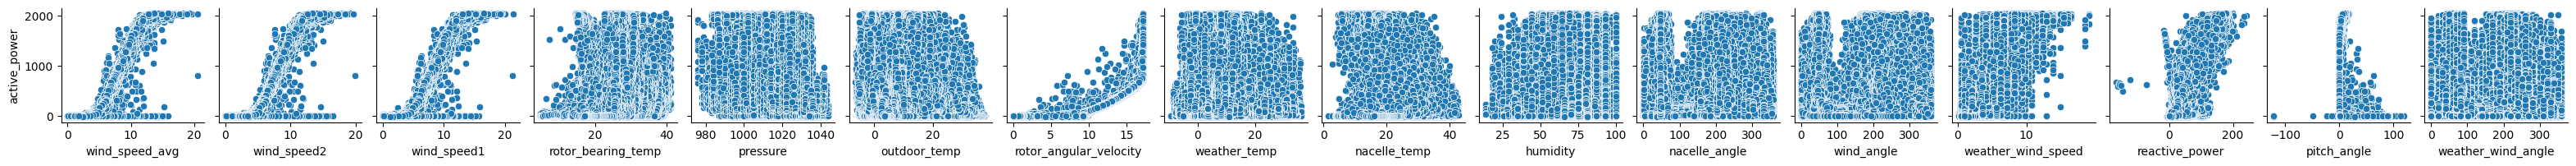

In [33]:
sns.pairplot(windDS, x_vars=['wind_speed_avg', 'wind_speed2', 'wind_speed1','rotor_bearing_temp','pressure','outdoor_temp','rotor_angular_velocity','weather_temp','nacelle_temp'
,'humidity','nacelle_angle','wind_angle','weather_wind_speed','reactive_power','pitch_angle','weather_wind_angle'], y_vars='active_power', height=2)
plt.show()

**3. Identify the coorelation**

In [53]:
windDS_FeatureDS = windDS[['active_power','wind_speed_avg', 'wind_speed2', 'wind_speed1','rotor_bearing_temp','pressure','outdoor_temp','rotor_angular_velocity','weather_temp','nacelle_temp'
,'humidity','nacelle_angle','wind_angle','weather_wind_speed','reactive_power','pitch_angle','weather_wind_angle']]
windDS_FeatureDS.corr()

,active_power,wind_speed_avg,wind_speed2,wind_speed1,rotor_bearing_temp,pressure,outdoor_temp,rotor_angular_velocity,weather_temp,nacelle_temp,humidity,nacelle_angle,wind_angle,weather_wind_speed,reactive_power,pitch_angle,weather_wind_angle
active_power,1.000000,0.887270,0.883143,0.886183,0.181216,-0.163830,-0.177630,0.718239,-0.109827,-0.345155,0.006019,0.053041,0.068155,0.745152,0.900180,-0.363420,0.106740
wind_speed_avg,0.887270,1.000000,0.996958,0.997225,0.301009,-0.179269,-0.126034,0.876649,-0.048391,-0.203356,-0.024044,0.052973,0.082483,0.732634,0.862402,-0.595640,0.156356
wind_speed2,0.883143,0.996958,1.000000,0.988430,0.275425,-0.183527,-0.153547,0.875842,-0.073901,-0.221878,-0.011197,0.049704,0.081378,0.730278,0.860295,-0.592708,0.154324
wind_speed1,0.886183,0.997225,0.988430,1.000000,0.323676,-0.174267,-0.099085,0.872430,-0.023797,-0.184557,-0.036160,0.055790,0.083091,0.730740,0.859482,-0.594993,0.157394
rotor_bearing_temp,0.181216,0.301009,0.275425,0.323676,1.000000,-0.045009,0.756958,0.346199,0.752631,0.609419,-0.366151,0.049792,0.045595,0.195061,0.210268,-0.356441,0.105921
pressure,-0.163830,-0.179269,-0.183527,-0.174267,-0.045009,1.000000,0.038185,-0.132317,-0.027313,0.045099,-0.030234,-0.095769,-0.094534,-0.228328,-0.141388,0.068698,-0.048055
outdoor_temp,-0.177630,-0.126034,-0.153547,-0.099085,0.756958,0.038185,1.000000,-0.145413,0.963074,0.692833,-0.584916,0.001469,-0.005359,-0.085729,-0.149803,0.061149,-0.011066
rotor_angular_velocity,0.718239,0.876649,0.875842,0.872430,0.346199,-0.132317,-0.145413,1.000000,-0.078201,-0.089565,0.015680,0.030701,0.061536,0.582844,0.727273,-0.837821,0.150529
weather_temp,-0.109827,-0.048391,-0.073901,-0.023797,0.752631,-0.027313,0.963074,-0.078201,1.000000,0.659313,-0.618568,0.041375,0.040636,0.028192,-0.086524,0.021009,0.041910
nacelle_temp,-0.345155,-0.203356,-0.221878,-0.184557,0.609419,0.045099,0.692833,-0.089565,0.659313,1.000000,-0.388600,0.001861,-0.005688,-0.225378,-0.279224,-0.086762,0.000722


**4. Create the heat map**

Text(0.5, 1.0, 'heatmap')

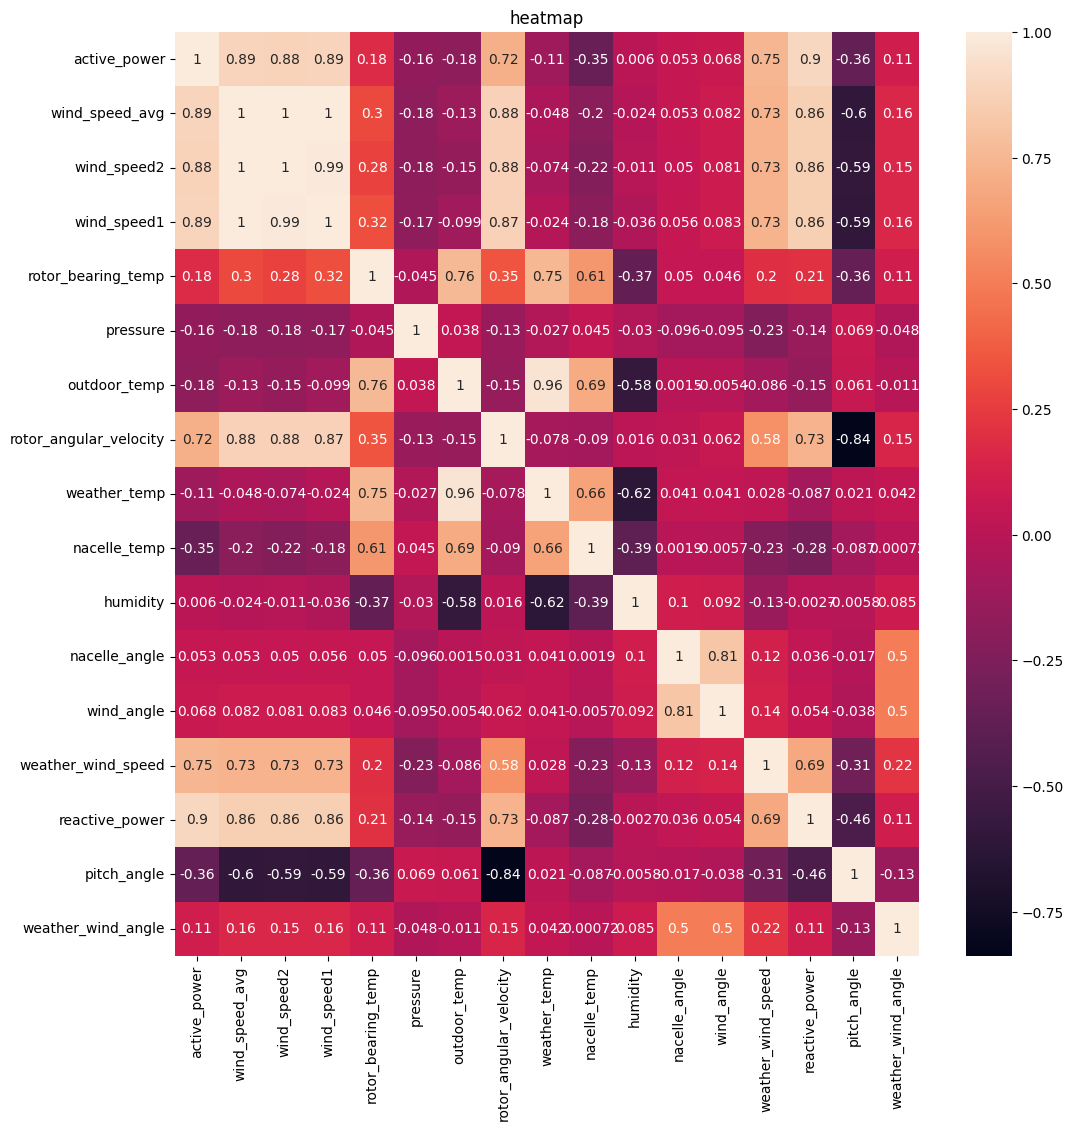

In [61]:
plt.figure(figsize=(12,12))
sns.heatmap(windDS_FeatureDS.corr(),annot=True)
plt.title('heatmap')

Pearson coorelation with the target

In [156]:
xFeatures = windDS[['wind_speed_avg','rotor_bearing_temp','pressure','outdoor_temp','rotor_angular_velocity','weather_temp','nacelle_temp'
,'humidity','nacelle_angle','wind_angle','weather_wind_speed','reactive_power','pitch_angle','weather_wind_angle']]
yFeatures = windDS['active_power']
X_selection = SelectKBest(r_regression, k=6)
fit = X_selection.fit_transform(xFeatures,yFeatures)
filter = X_selection.get_support()
features = xFeatures.columns.values

print("All features:")
print(features)

print("Selected best 8:")
print(features[filter])
print(fit)

All features:
['wind_speed_avg' 'rotor_bearing_temp' 'pressure' 'outdoor_temp'
 'rotor_angular_velocity' 'weather_temp' 'nacelle_temp' 'humidity'
 'nacelle_angle' 'wind_angle' 'weather_wind_speed' 'reactive_power'
 'pitch_angle' 'weather_wind_angle']
Selected best 8:
['wind_speed_avg' 'rotor_bearing_temp' 'rotor_angular_velocity'
 'weather_wind_speed' 'reactive_power' 'weather_wind_angle']
[[  7.64  26.05  16.95   5.66  67.56 180.  ]
 [  8.31  26.1   17.14   5.66  70.26 180.  ]
 [  8.47  26.22  17.15   5.66  75.33 180.  ]
 ...
 [  2.59  16.61   9.23   1.54   4.17   0.  ]
 [  2.34  16.83   9.23   1.03   6.32   0.  ]
 [  1.8   17.02   9.23   1.03   2.38   0.  ]]


Setting the values for independent (X) variable and dependent (Y) variable



In [157]:
x = windDS[['wind_speed_avg','rotor_bearing_temp','rotor_angular_velocity','reactive_power','weather_wind_angle','weather_wind_speed']]
y = windDS['active_power']

Splitting the dataset into train and test set

In [158]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

Implementing the linear model

In [159]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

Intercepts and coefficents

In [160]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -189.6909503589814
Coefficients:


[('wind_speed_avg', 90.22045519788),
 ('rotor_bearing_temp', -4.0118600841911025),
 ('rotor_angular_velocity', -11.284538983877423),
 ('reactive_power', 6.374999832177168),
 ('weather_wind_angle', -0.11793201043961693),
 ('weather_wind_speed', 26.400528777429322)]

Prediction on the test set

In [161]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 284.628 1616.744  225.784 ...  -59.002 -222.467  368.327]


Actual values and the predicted values

In [162]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
186813,188.280000,284.628369
45433,1790.060100,1616.744248
64742,97.010002,225.784457
151113,156.500000,194.090528
24054,0.000000,-92.596076


Evaluating the Model

In [163]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 87.68
Mean Absolute Error: 116.51699410757834
Mean Square Error: 22437.164817299865
Root Mean Square Error: 149.79040295459475


**R squared:**  -->  percent falls on the regression line

**Mean Absolute Error:**  --> absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance

**Mean Square Error:** -->calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance

**Root Mean Square Error:** -->the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance.